In [1]:
import anndata
import numpy as np
import scipy as sp
import sys
import pandas as pd
import torch
import torch_geometric
import os.path
sys.path.insert(1, '../')
import matplotlib.pyplot as plt
from scipy.io import mmread, mmwrite
from numpy import savetxt
%load_ext autoreload
%autoreload 2

In [2]:
import topovelo as tpv

In [86]:
dataset = 'Pancreas'
root = '/scratch/blaauw_root/blaauw1/gyichen'
adata = anndata.read_h5ad(f'{root}/data/{dataset}_pp.h5ad')

In [87]:

model_path_base = f'{root}/checkpoints/{dataset}'
figure_path_base = f'{root}/figures/{dataset}'
data_path = f'{root}/data/velovae/continuous/{dataset}'
gene_plot = tpv.sample_genes(adata, 4, 'means')

In [115]:
figure_path = f'{figure_path_base}/Graph'
model_path = f'{model_path_base}/Graph'

torch.manual_seed(2022)
np.random.seed(2022)

vae = tpv.VAE(adata, 
              tmax=20, 
              dim_z=5, 
              device='cpu')

Estimating ODE parameters...


  0%|          | 0/2000 [00:00<?, ?it/s]

Detected 901 velocity genes.
Estimating the variance...


  0%|          | 0/2000 [00:00<?, ?it/s]

Initialization using the steady-state and dynamical models.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/2000 [00:00<?, ?it/s]

3 clusters detected based on gene co-expression.
(0.49, 0.34843595768045504), (0.51, 0.7329538970887918)
(0.55, 0.31774595674199757), (0.45, 0.7678039422838004)
(0.57, 0.812504473951968), (0.43, 0.44401169136605384)
KS-test result: [0. 0. 0.]
Initial induction: 1163, repression: 837/2000


In [105]:
graph = adata.obsp['connectivities']

--------------------------- Train a VeloVAE ---------------------------
*********               Creating a Graph Dataset              *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Epoch 1: Train ELBO = 3774464.128,	Test ELBO = 4257246.080,	Total Time =   0 h :  0 m :  7 s
Epoch 2: Train ELBO = 3340159.622,	Test ELBO = 3789036.971,	Total Time =   0 h :  0 m : 15 s
Epoch 3: Train ELBO = 2946713.785,	Test ELBO = 3789036.971,	Total Time =   0 h :  0 m : 22 s
Epoch 4: Train ELBO = 2593412.793,	Test ELBO = 3789036.971,	Total Time =   0 h :  0 m : 30 s


StopIteration: 

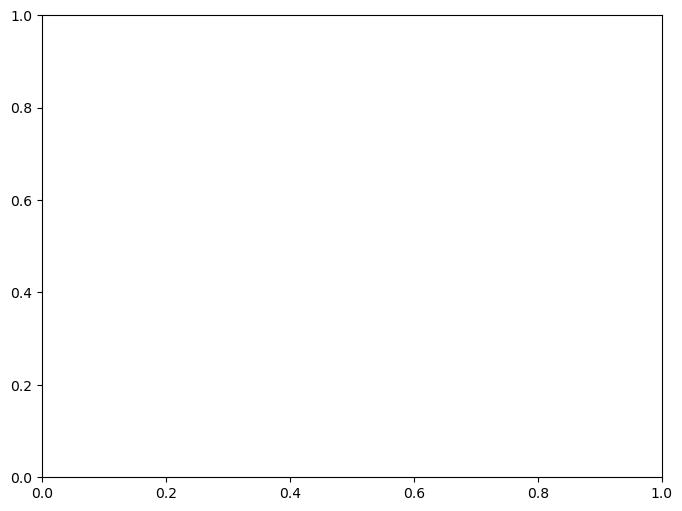

In [116]:
config = {
    'save_epoch': 1,
    'learning_rate': 2e-5,
    'learning_rate_ode': 2e-5,
    'learning_rate_post': 2e-5,
}
vae.train(adata, graph, config=config, plot=True, gene_plot=gene_plot, figure_path=figure_path)
#vae.save_model(model_path, 'encoder', 'decoder')
#vae.save_anndata(adata, 'velovae', data_path, file_name=f'{dataset}.h5ad')

In [ ]:
vae.graph_data.neighbor_indices.dtype

In [ ]:
vae.encoder.bias_1.dtype

In [ ]:
vae.encoder.bias_2.dtype